In [25]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from quantum_dynamics import Dynamics
import numpy as np
from ions import Chain
from ion_trap import IonTrap
import matplotlib.pylab as plt  
from laser import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
omegax = 2.0e6
omegaz = 150.e3
N = 5
chain = Chain(N, 2)
dummy_trap = IonTrap( omegax , omegaz)
dummy_trap.load(chain)


In [22]:
motional_state = (1,0,0,0,0)
electronic_state = (0,0,0,0,0)
laser = Laser( ion_num = 5, sideband_num = 1, intensity = 0, phase = 2*np.pi* 0, detuning=0)
#chain.set_thermal_motional_state( motional_state )
chain.set_pure_motional_state( motional_state )
chain.set_pure_electronic_state_numbers( electronic_state )


dyn_wout_laser = Dynamics(chain, lasers = [laser], pulses = [])
observables = [ dyn_wout_laser.a[0].dag() * dyn_wout_laser.a[0] ]
time_interval = (0., 2000.e-6)
time_precision = 2.e-6
times = np.arange(time_interval[0], time_interval[1], time_precision)
dyn_wout_laser.evolve_pure(time_interval, observables)

laser.intensity, laser.detuning = 2*np.pi* 200.e3, 2*np.pi* 100.e3 
#chain.set_thermal_motional_state( motional_state )

dyn_w_laser = Dynamics(chain, lasers = [laser], pulses = [])
dyn_w_laser.evolve_pure(time_interval, observables)

Simulation running in RWA regime
Simulation running in RWA regime


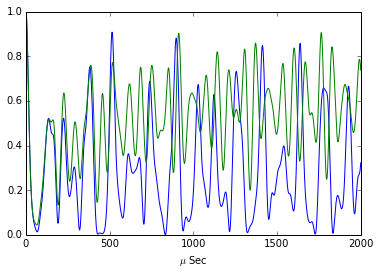

In [5]:
plt.plot(times*1.e6, dyn_wout_laser.expectations[0], times*1.e6, dyn_w_laser.expectations[0])
plt.xlabel("$\mu$ Sec")
plt.savefig('../Data_Storage/{}ions-InitState{}_{}KHzAxial_Rabifreq{}_Detuning{}.jpg'.format(N, motional_state,omegaz/1.e3, laser.intensity/(2*np.pi*1.e3), laser.detuning/(2*np.pi*1.e3), bbox_inches='tight'))
plt.show()